In [136]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [127]:
def SimpleRandomWalk(number_of_steps: int, starting_point: int = 0, drift_probability: float = 0.5) -> np.ndarray:
    N=number_of_steps+1 # because we have some steps to do and a starting point

    #Create an array of positions for the walker.  And initialize the first position
    #to be the origin (zero).  The array will have the size of the number of steps + 1.
    #A position counter variable is also used, which is initialized to zero as well.
    position = np.empty(N)
    position[0] = pos_counter = starting_point

    #Array containing the full range of the number of possible steps taken.
    steps = np.arange(N)

    #Start the random walk.
    for i in range(1,N):
        #Generate a random probability value between 0 and 1.
        random_step = np.random.uniform(0,1)
        
        #Check the value of the probability generated.  If it is <  to drift_probability, increment the step forwards.
        #If it is more or equal than drift_probability, increment a step backwards instead.  Keep track of the position counter after
        #updating it.
        if random_step >= drift_probability:
            pos_counter -= 1
        else:
            pos_counter += 1

        #Fill the current position array index with the current value of the position counter from the loop.
        position[i] = pos_counter

    #Generate a plot of walker position vs. the number of steps taken.  Line is a string that will describe the
    #markers and line type used to plot the random walk.
    if number_of_steps<=200:
        line_type='o--'
    else:
        line_type='-'
    plt.plot(steps, position, line_type)
    plt.xlabel('Steps taken')
    plt.ylabel('Distance from Starting Position')
    plt.show()

    return position

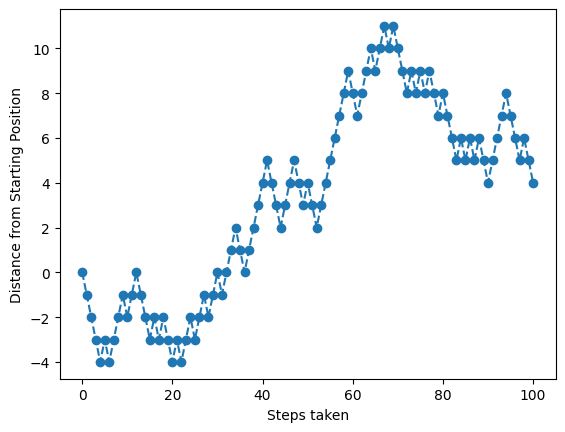

In [144]:
simple_random_walk_series = SimpleRandomWalk(100, 0, 0.5)

In [129]:
simple_random_walk_series.mean()

-10.378737541528238

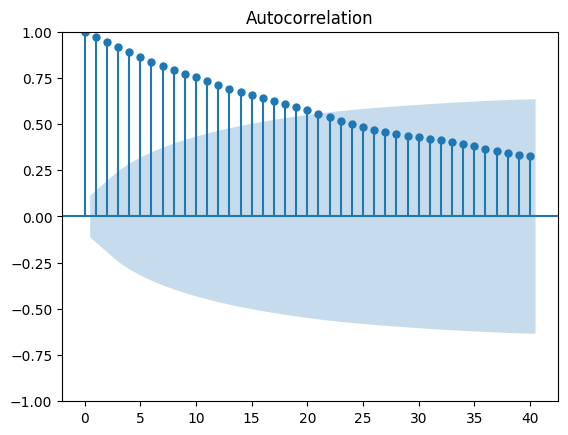

In [140]:
sm.graphics.tsa.plot_acf(simple_random_walk_series, lags=40)
plt.show()

In [131]:
def GaussianRandomWalk(number_of_steps: int, starting_point: float = 0, standard_dev: float = 1, drift: float = 0) -> np.ndarray:
    N=number_of_steps+1 # because we have some steps to do and a starting point

    #Create an array of positions for the walker.  And initialize the first position
    #to be the origin (zero).  The array will have the size of the number of steps + 1.
    #A position counter variable is also used, which is initialized to zero as well.
    position = np.empty(N)
    position[0] = pos_counter = starting_point

    #Array containing the full range of the number of possible steps taken.
    steps = np.arange(N)

    #Start the random walk.
    for i in range(1,N):
        #Generate a normal probability value, mean = 0, sd = standard_dev
        random_step = np.random.normal(0, standard_dev)
        pos_counter = pos_counter + drift + random_step # here we have deterministic drift included

        #Fill the current position array index with the current value of the position counter from the loop.
        position[i] = pos_counter

    #Generate a plot of walker position vs. the number of steps taken.  Line is a string that will describe the
    #markers and line type used to plot the random walk.
    plt.plot(steps, position)
    plt.xlabel('Steps taken')
    plt.ylabel('Distance from Starting Position')
    plt.show()

    return position

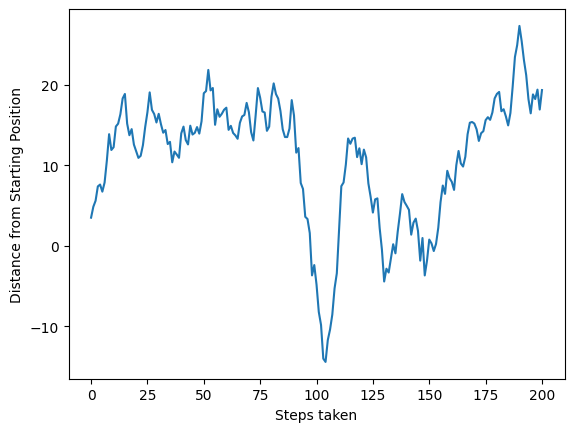

In [142]:
gaussian_random_walk_series = GaussianRandomWalk(number_of_steps=200, starting_point=3.5, standard_dev=2, drift=0)

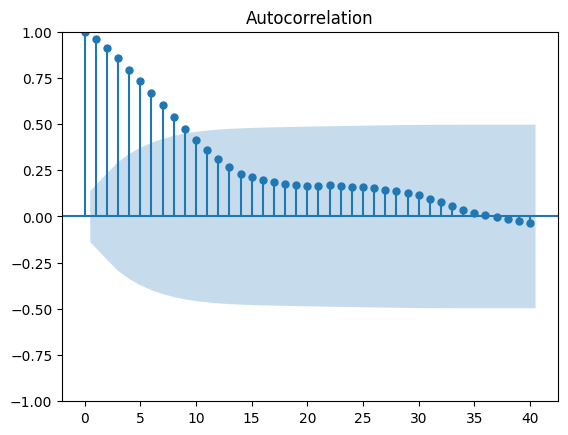

In [143]:
sm.graphics.tsa.plot_acf(gaussian_random_walk_series, lags=40)
plt.show()

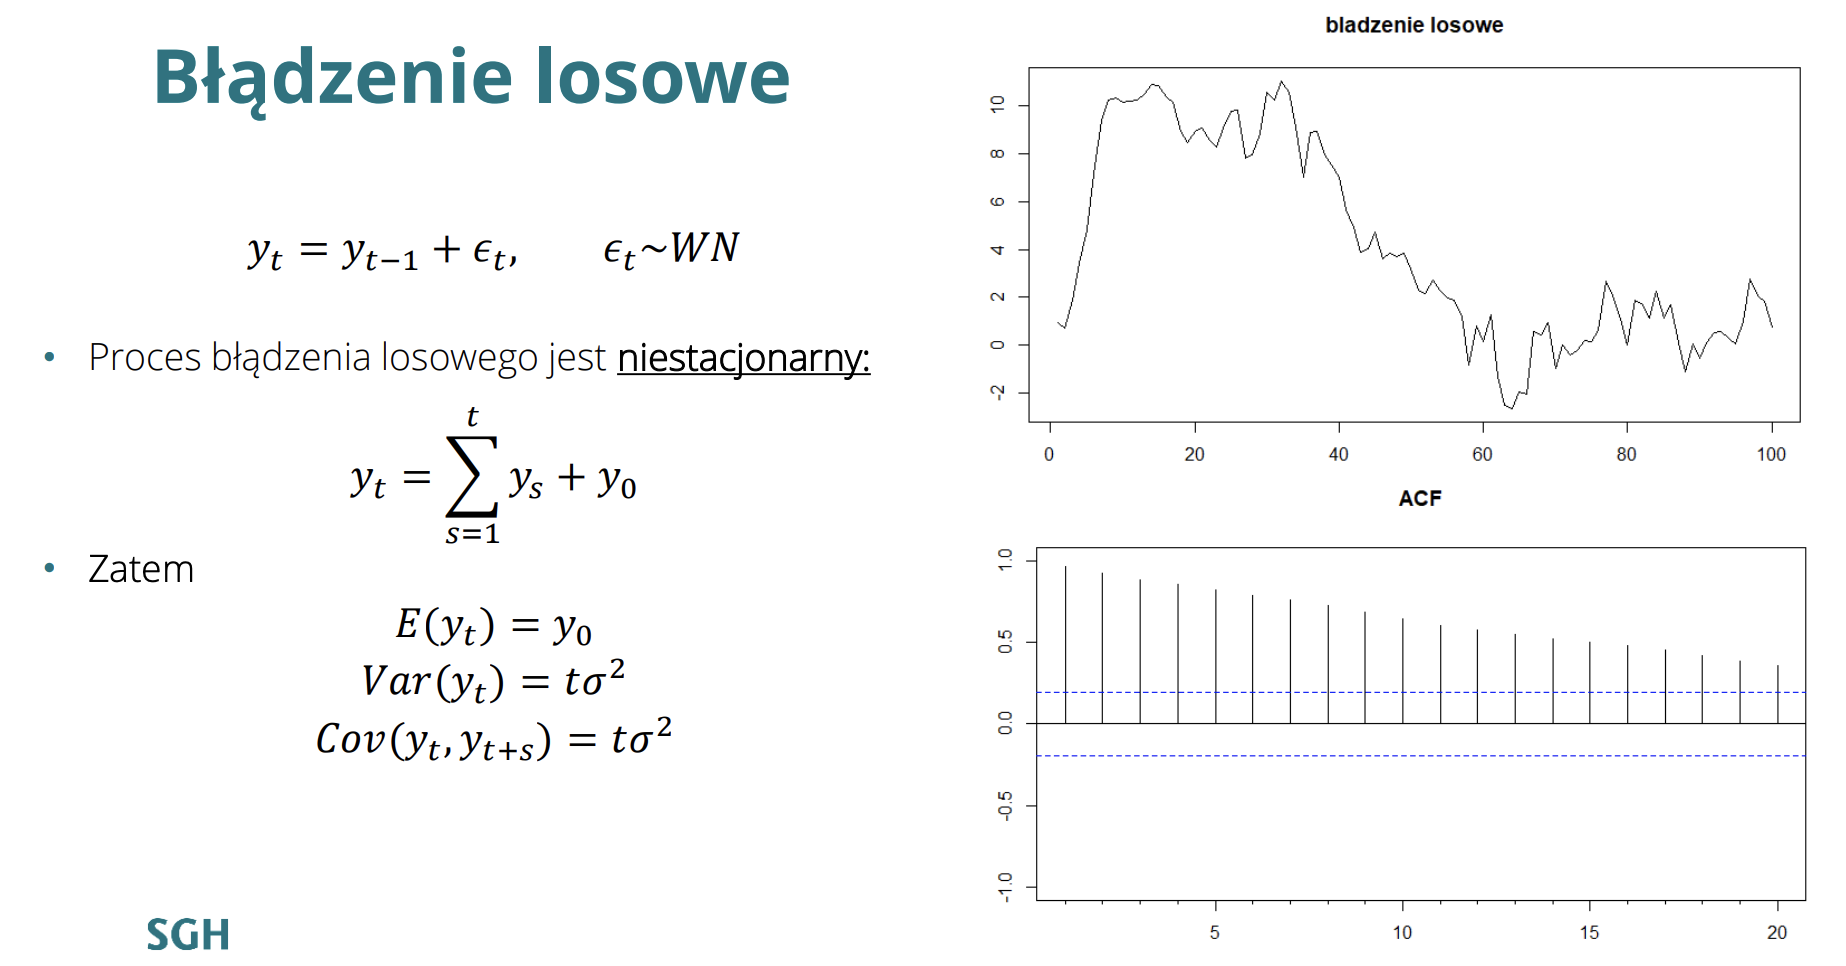

**Błądzenie losowe ma wiele zastosowań w różnych dziedzinach. W informatyce przykładowo do symulacji różnych procesów, których zbadanie dokładnych wartości jest niemożliwe lub bardzo trudne/kosztowne takich jak mierzenie charakterystyk ogromnych sieci na podstawie próbki a nie całego zbioru. W ekonomii hipoteza błądzenia losowego używana jest do modelowania cen instrumentów finansowych lub oceny ryzyka pewnych inwestycji. Jest też mnóstwo zastosowań błądzenia losowego w fizyce, w szczególności z wykorzystaniem modeli ruchów Browna, dotyczą one właściwości różnych substancji, zachowań cząsteczek, czy przykładowo modelowania "wydarzeń epidemicznych". Kolejnym ogromnym polem do popisu dla random walku jest biologia i wszelkiego rodzaju badania nad bakteriami i ruchami grup zwierząt, i co ciekawe nawet analiza połączeń w ludzkim mózgu. Istnieje wiele innych potenjalnych zastosowań błądzenia losowego, widzimy więc, że pomimo jego prostoty posiada on bardzo dużo możliwości prognostycznych i potencjalnych zastosowań w rzeczywistym świecie.**